In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating test data set and train dataset same as in the problem question

In [23]:
#data=pd.read_csv('advertising.csv')
#test_data=data.loc[900:1000]
#train_data=data.loc[0:899]
#test_data.to_csv('test_data.csv')
#train_data.to_csv('train_data.csv')

In [179]:
train_data=pd.read_csv('train_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   Daily Time Spent on Site  900 non-null    float64
 2   Age                       900 non-null    int64  
 3   Area Income               900 non-null    float64
 4   Daily Internet Usage      900 non-null    float64
 5   Ad Topic Line             900 non-null    object 
 6   City                      900 non-null    object 
 7   Male                      900 non-null    int64  
 8   Country                   900 non-null    object 
 9   Timestamp                 900 non-null    object 
 10  Clicked on Ad             900 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 77.5+ KB


In [180]:
train_data.isna().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


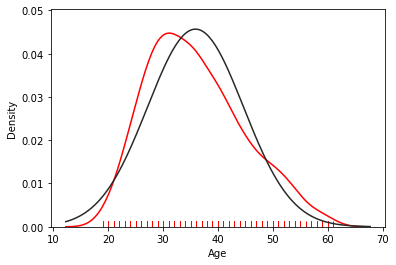

In [181]:
from scipy.stats import norm
sns.distplot(train_data['Age'], hist=False, color='r', rug=True, fit=norm);

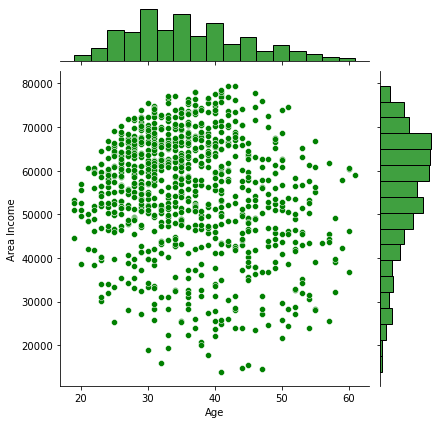

In [182]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= train_data)

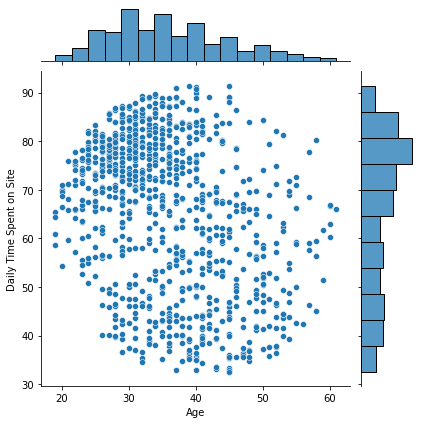

In [183]:

sns.jointplot(x='Age', y='Daily Time Spent on Site', data= train_data);


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


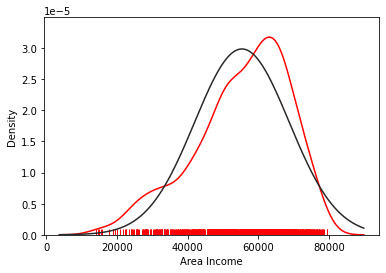

In [184]:
from scipy.stats import norm
sns.distplot(train_data['Area Income'], hist=False, color='r', rug=True, fit=norm);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


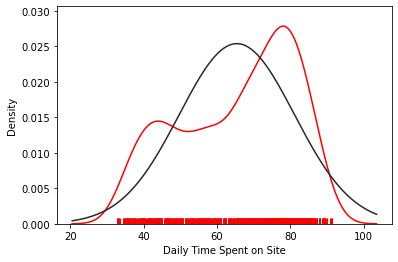

In [185]:
from scipy.stats import norm
sns.distplot(train_data['Daily Time Spent on Site'], hist=False, color='r', rug=True, fit=norm);

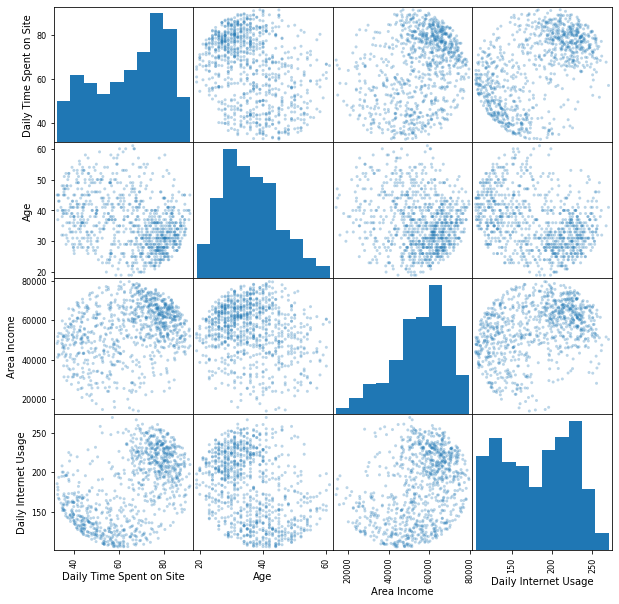

In [186]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data[['Daily Time Spent on Site', 'Age','Area Income', 'Daily Internet Usage']],
    alpha=0.3, figsize=(10,10));

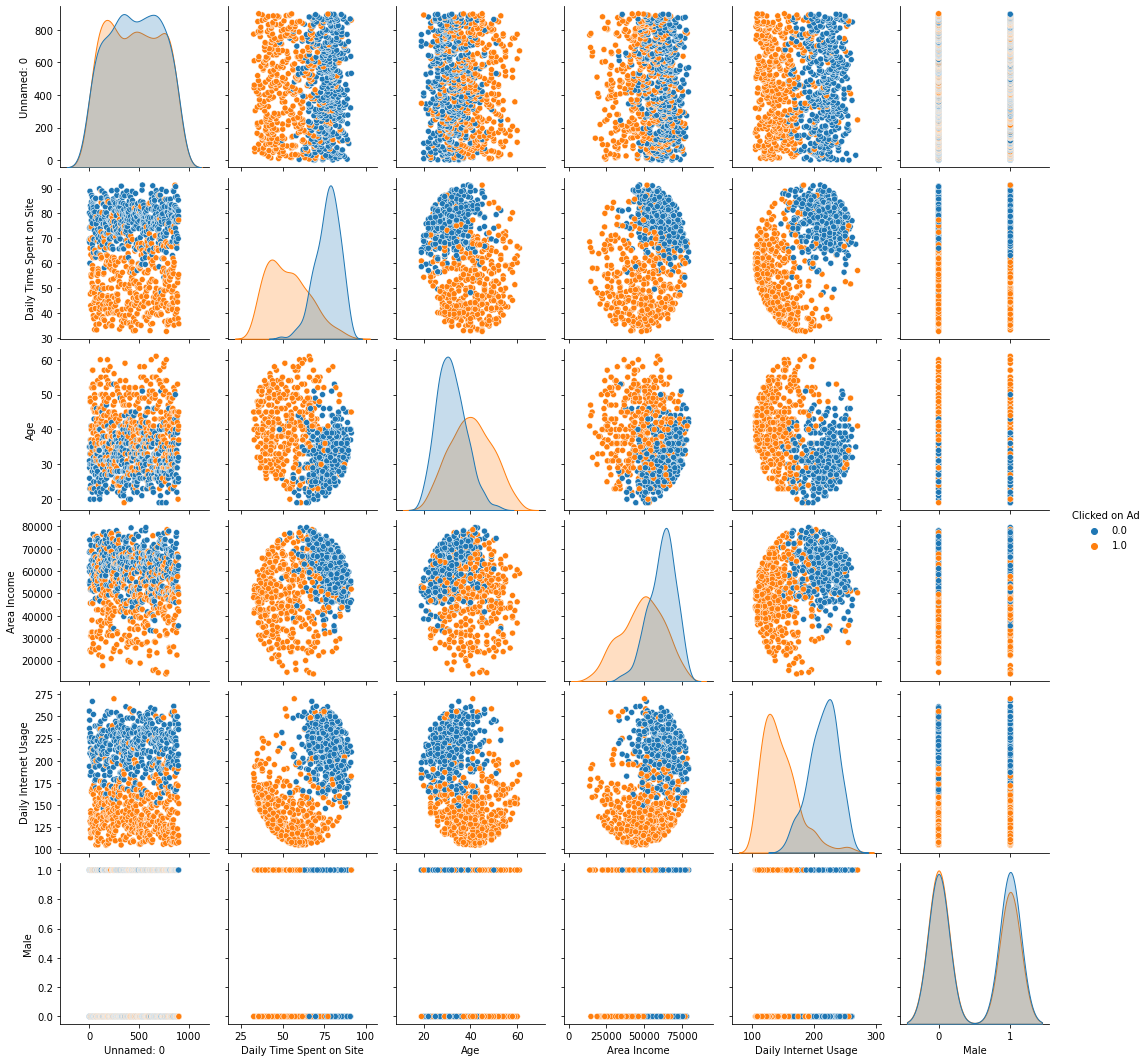

In [187]:
sns.pairplot(train_data, hue='Clicked on Ad');

In [188]:
train_data.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/16 0:53,0.0
1,1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/16 1:39,0.0
2,2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/16 20:35,0.0
3,3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/16 2:31,0.0
4,4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/16 3:36,0.0


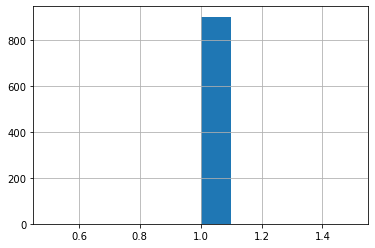

In [189]:
train_data['Ad Topic Line'].value_counts().hist();

<AxesSubplot:>

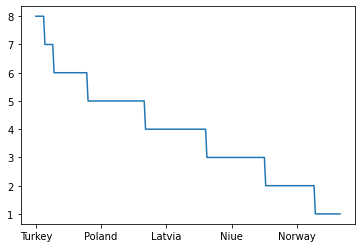

In [190]:
train_data['Country'].value_counts().plot()

In [191]:
object_variables = ['Ad Topic Line', 'City', 'Country']
train_data[object_variables].describe(include=['O'])


,Ad Topic Line,City,Country
count,900,900,900
unique,900,875,234
top,Reverse-engineered dynamic function,Williamsport,Turkey
freq,1,3,8


## From the above looks like for 'Ad Topic Line', 'City'  almost all values are unique
## Country on the other hand does not have as many unique values and values are distributed

In [192]:
train_data=train_data.drop(['Ad Topic Line', 'City','Country'],1)

In [193]:
train_data['Timestamp']=pd.to_datetime(train_data['Timestamp'])
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['day_of_month']=pd.to_datetime(train_data['Timestamp']).dt.day
train_data['day_of_week']=pd.to_datetime(train_data['Timestamp']).dt.dayofweek
train_data['Hour'] = train_data['Timestamp'].dt.hour

train_data = train_data.drop(['Timestamp'], axis=1)

In [194]:
train_data

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,day_of_month,day_of_week,Hour
0,0,68.95,35,61833.90,256.09,0,0.0,3,27,6,0
1,1,80.23,31,68441.85,193.77,1,0.0,4,4,0,1
2,2,69.47,26,59785.94,236.50,0,0.0,3,13,6,20
3,3,74.15,29,54806.18,245.89,1,0.0,1,10,6,2
4,4,68.37,35,73889.99,225.58,0,0.0,6,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...
895,895,80.99,26,35521.88,207.53,1,0.0,6,10,4,3
896,896,78.84,32,62430.55,235.29,1,0.0,4,9,5,9
897,897,77.36,41,49597.08,115.79,0,1.0,2,26,4,6
898,898,55.46,37,42078.89,108.10,0,1.0,2,21,6,23


In [266]:
from sklearn.model_selection import train_test_split

X = train_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'day_of_month' ,'day_of_week','Hour']]
y = train_data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [276]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))


Decision tree accuracy: 0.9393939393939394


In [250]:
def full_pipeline(data_csv):
    data_csv['Timestamp']=pd.to_datetime(data_csv['Timestamp'])
    data_csv['Month'] = data_csv['Timestamp'].dt.month
    data_csv['day_of_month']=pd.to_datetime(data_csv['Timestamp']).dt.day
    data_csv['day_of_week']=pd.to_datetime(data_csv['Timestamp']).dt.dayofweek
    data_csv['Hour'] = data_csv['Timestamp'].dt.hour

    data_csv = data_csv.drop(['Timestamp'], axis=1)
    data_csv=data_csv.drop(['Ad Topic Line', 'City','Country'],1)
    data_csv=data_csv.dropna()
    data_csv=data_csv[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
    'Male', 'Month', 'day_of_month' ,'day_of_week','Hour','Clicked on Ad']]
    return data_csv

Transformations:
1. change timestamp to proper timestamp
2. extract day, dayof month, month, hour from timestamp
3. drop timestamp,city,country and ad topic line 

In [292]:

test_data=pd.read_csv('test_data.csv')
test_data=full_pipeline(test_data)

X_test = test_data.drop("Clicked on Ad", axis=1)
y_test = test_data["Clicked on Ad"].copy()
X_test_prepared = X_test

final_predictions = model_2.predict(X_test_prepared)

print('Decision tree accuracy:', accuracy_score(final_predictions, y_test))


Decision tree accuracy: 0.9393939393939394


In [293]:
test_data['Predictions'] = final_predictions

In [295]:
test_data['Result'] = np.where(test_data['Clicked on Ad']==test_data['Predictions'],'Pass','Mistake')

In [296]:
test_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,day_of_month,day_of_week,Hour,Clicked on Ad,Predictions,Result
0,50.78,51,49957.00,122.04,0,2.0,11.0,3.0,17.0,1.0,1.0,Pass
1,40.47,38,24078.93,203.90,0,7.0,22.0,4.0,7.0,1.0,1.0,Pass
2,45.62,43,53647.81,121.28,0,6.0,26.0,6.0,2.0,1.0,1.0,Pass
3,84.76,30,61039.13,178.69,0,5.0,14.0,5.0,23.0,0.0,0.0,Pass
4,80.64,26,46974.15,221.59,0,5.0,24.0,1.0,10.0,0.0,0.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
94,43.70,28,63126.96,173.01,0,4.0,4.0,0.0,3.0,1.0,1.0,Pass
95,72.97,30,71384.57,208.58,1,2.0,11.0,3.0,21.0,1.0,0.0,Mistake
96,51.30,45,67782.17,134.42,1,4.0,22.0,4.0,2.0,1.0,1.0,Pass
97,51.63,51,42415.72,120.37,1,2.0,1.0,0.0,17.0,1.0,1.0,Pass


In [308]:
result=test_data[['Predictions','Result']].to_csv('result.csv',index=False)

,Predictions,Result
0,1.0,Pass
1,1.0,Pass
2,1.0,Pass
3,0.0,Pass
4,0.0,Pass
...,...,...
94,1.0,Pass
95,0.0,Mistake
96,1.0,Pass
97,1.0,Pass
